# 1. Fundamental Theorem of Calculus
All across the field of Machine Learning calculus is utilized. In the world of Deep Learning, optimization via the backpropagation reigns supreme, and it is often easy to end up either letting the computer handle all of the derivation and integration for you, or to forget the underlying intuition of what the equations mean in english. 

<br>
This notebook was designed with the idea of being a fun review that will create a deeper understanding of a fundamental theorem that is seen in nearly every corner of Machine Learning. We will be exploring the relationship between **distance** and **velocity** since they are easily understood based on every day experiences. 

<br>
Before we begin, however, I want you to try and do the following two things:
> 1. Explain in english, what a derivative is.
2. Then explain what an integral is...and what does it have to do with area...?

Take 5 minutes to try this! The reason it is a valuable exercise is because often times when learning math you may either never fully understand the intuition and resort to rote memorization, or over the years it has been lost as software has been able to implement the mechanical calculations for you. If this was the case for you then I think you will find this walkthrough very enjoyable, and you may come away with a greater appreciation for just how beautiful calculus is! 

## 1.0 Prerequisite: Input vs. Response
Before we can begin we need to quickly review what exactly a function is. Forget $x$s and $y$s for the moment, forget equations that have been rotely memorized. What is a function, and why would we even need one? 

Well let's consider the real world scenario where you are trying to buy a car. Let's say you know that the car was made in 2010 and it has 100,000 miles on it. Intuitively, and without even realizing it, you create a function that maps those features of the car, to what you feel it is worth. Maybe you think that car is worth 4,000 dollars. That means that in some way you decided in your head that there is a function, which we can call $Car \;Price \;Estimator$:

#### $$Function = Car \; Price \; Estimator $$

And it takes two inputs, the year it was made and the number of miles on it:

#### $$Car \; Price \; Estimator (Year \; made, number \; of \; miles)$$

And that yielded an output, of 4,000 dollars:

#### $$Car \; Price \; Estimator (2010, 100000 \;miles) = 4000 \; dollars$$

This can be seen visually as well:

<br>
<img src="images/function.png">
<br>

Think of how often that may happen-a situation where you take in information about the world around you, and you then say "hmmm there is definitely a relationship between these two things". Well, in mathematical terms that relationship is a function. If you are wondering, "why do we need to turn a normal everyday relationship into a mathematical equation?", well, the simplest answer is because it allows you to do very powerful things. 

As a motivator for why functions are so powerful I will leave you with this list of what they can and currently do:
1. We can create functions that define the relationship between certain images of cancer cells and whether or not the patient actually has cancer
2. We can create functions that take in thousands of pixels associated with image and then determine what is in that image
3. We can create functions that predict given a certain population and its characteristics, how quickly will a disease spread. 

Okay, so with that in mind I want us to remember that a function can be thought of as a map of a relationship. 

---

## 1.1 Distance 
To begin let's just think about the concept of **distance**. The units (meters, miles, kilometers, inches, etc) do not particularly matter and in reality can just get in the way, so we will leave them unitless for now. For now we can just think about distance as how far you travel as a function of **time**. We will define our distance function for this walkthrough to be: 

#### $$Distance = s(t) = 4t^2 - \frac{1}{3}t^3$$ 

Note that the reason I am using the variable $s$ to represent the distance function is to prevent confusion with derivative notation that will be introduced shortly. With that said, let's get a visualization of this function.

In [5]:
# Imports
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import rc
import seaborn as sns

# Seaborn Plot Styling
sns.set(style="white", palette="husl")
sns.set_context("poster")
sns.set_style("ticks")

%matplotlib notebook
from IPython.display import HTML

""" ------- Initial Constants -------"""
lower_initial = 0
upper_initial = 8
length = 2000

In [6]:
""" ------ Distance Function ------ """
def distance(x):
  return 4 * np.power(x, 2) - (1 / 3) * np.power(x, 3)

<IPython.core.display.Javascript object>


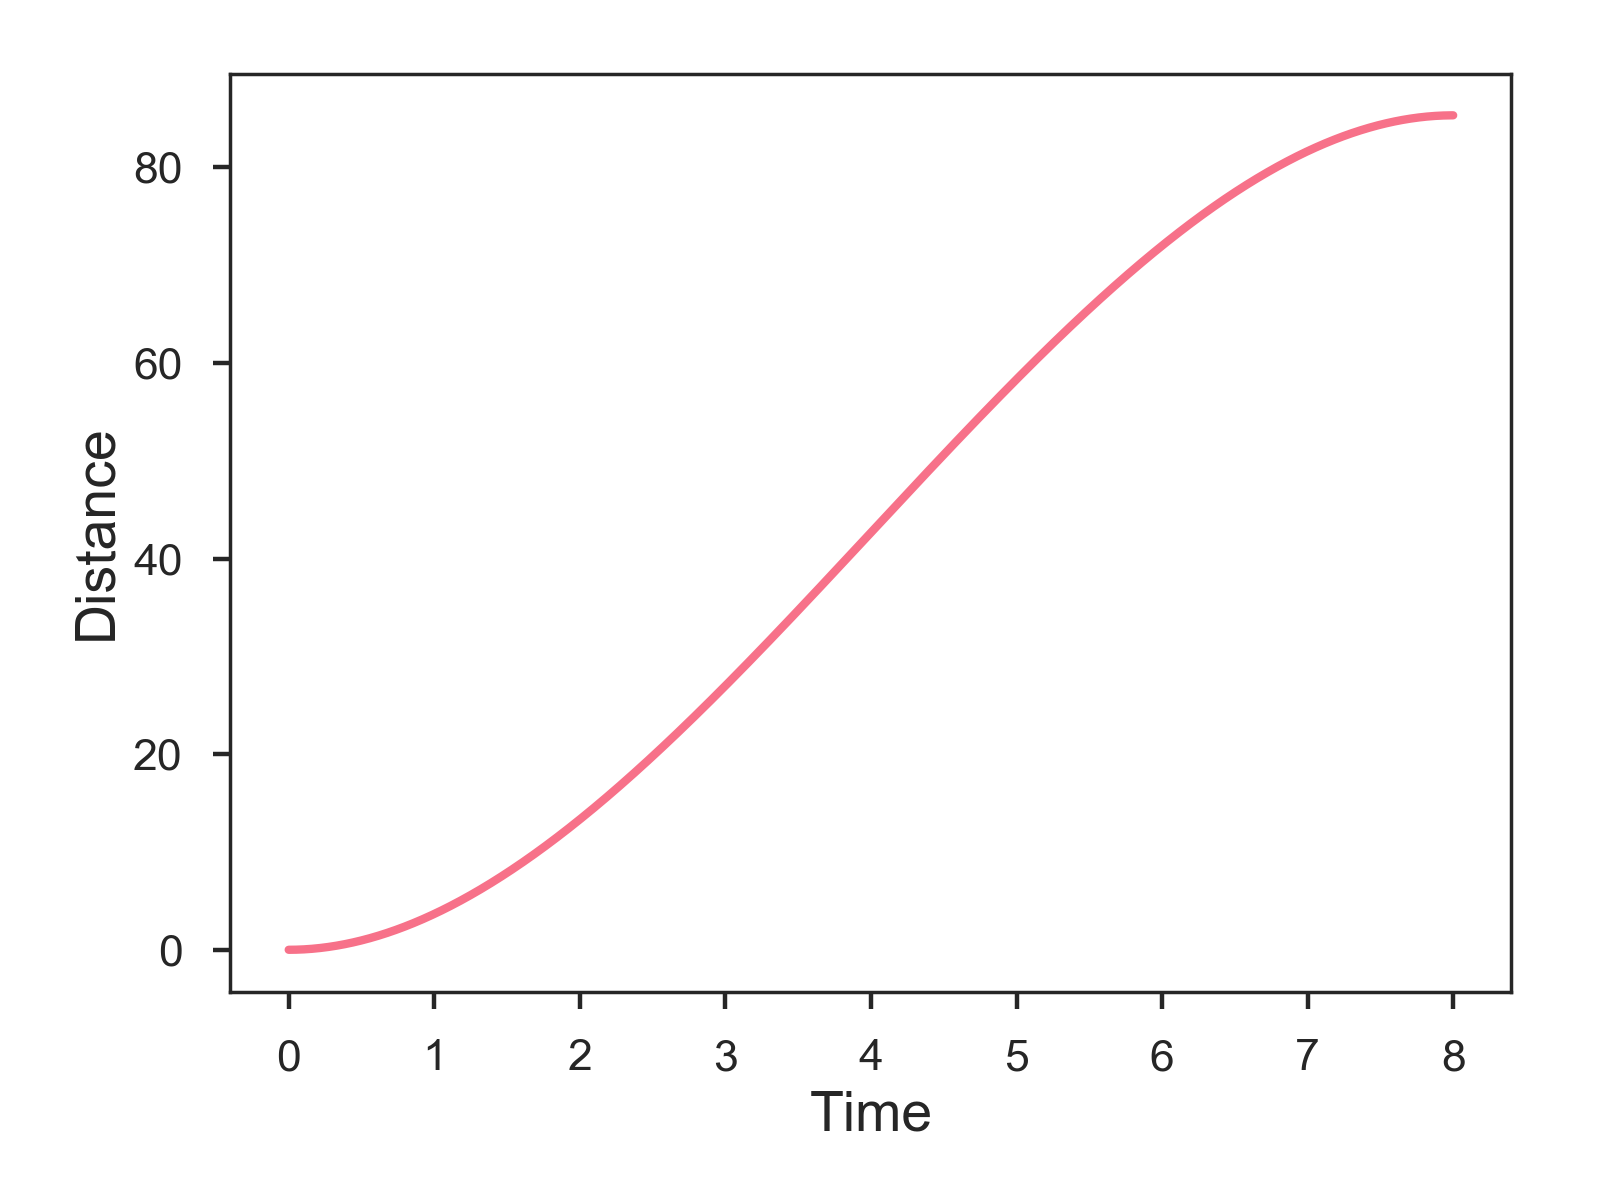

In [8]:
plt.ioff() 
fig, (ax1) = plt.subplots(1, figsize=(8, 6))            # Create figure and axis object   
ax1.set_xlabel('Time', fontsize=20)
ax1.set_ylabel('Distance', fontsize=20)
plt.tight_layout()

x = np.linspace(lower_initial, upper_initial, length)
y = distance(x)
ax1.plot(x, y, lw=3)
plt.show()

Awesome. So we can see that the curve representing $s(t)$ is steepest when time is equal to 4, and at the ends (0 and 8) it becomes flat. Of course the steepness that we are talking about is known as **slope**, or **rate of change**. When time is equal to 4 the rate of change is high, meanwhile when time is equal to 0 or 8 the rate of change is low. 

Now before we bring in the concept of a derivative, let's look at an animation of this curve being created. What we want to focus on is what happens to our **distance** at time $t$ when we change $t$ slightly? 

In [10]:
plt.ioff()                                              # Turn off interactive plotting
fig, (ax1, ax2) = plt.subplots(2, figsize=(5, 7))       # Create figure and axis object   
ax1.set_ylabel('Distance', fontsize=20)
ax2.set_ylabel('Distance', fontsize=20)
ax2.set_xlabel('Time', fontsize=20)
plt.tight_layout()
d, = ax1.plot(0, 0, lw=3)                         # Initialize plot object for distance
d2, = ax2.plot(0, 0, lw=3)                         # Initialize plot object for distance

def animate_distance(upper_bound):
  x = np.linspace(0, upper_bound, length)
  dist = distance(x)                                # Getting y-value, velocity
  d.set_data(x, dist)                               # Set our data
  d2.set_data(x, dist)                               # Set our data
  for i in range(0,4):
    ax2.axvline(x=i*2, ymax=100, color="lightblue")

def init_distance():
  ax1.set_xlim(0, 8)                               # Initialize x and y limits
  ax1.set_ylim(0, 100) 
  ax2.set_xlim(0, 8)                               # Initialize x and y limits
  ax2.set_ylim(0, 100) 
  return d, d2

""" Define steps and create animation object """
step = 0.05
steps = np.arange(0, 8, step)
html_video = HTML(FuncAnimation(fig, animate_distance, steps, init_func=init_distance, 
                                interval=50, blit=True).to_html5_video())
html_video

We can see two animations of the same curve above. They are each plotting distance as a function of time, as described by our original equation. The second animation has simply broken the plot down into intervals of 2 seconds. 

Now, watch as as the $s(t)$ curve is drawn and play close attention specifically to how $s(t)$ responds to changes in $t$ over intervals of 2 seconds. To make this more concrete, let's break this down into intervals. 

<br>
**Interval 1: $[time =0, time =2]$** <br>
Take the slider that controls the animation and move it from 0 to 2 seconds manually. We can define our interval as:

#### $$interval_1 = t_2 - t_0 = 2 \; seconds $$

How much of a change in distance is there during that 2 second interval? Well, we go from a distance of 0 to a distance of approximately 16.

#### $$change \; in \; distance \; during \; interval_1 = 16 - 0 = 16$$

(Note that I have not calculated the specific change in distance here purposefully; I am simply using the plot in order to keep this understanding visual, mechanical calculations will come soon enough). 

So, for $interval_1$ we can say that our change in $t$ of 2 seconds, caused a response in the distance of 16. 

<br>
**Interval 2: $[time =2, time =4]$** <br>
If we then look at the next interval, from $t = 2$ to $t =4$: 

#### $$interval_2 = t_4 - t_2 = 2 \; seconds $$

We can see that our increase is:

#### $$s(t =4) - s(t = 2) = 41 - 16 = 25  $$ 

So, in this 2 second interval, $s(t)$ increased by approximately 25. 

---
<br>
### 1.1.1 Key Idea 
What we have seen first hand is that during different 2 second intervals of $t$, our distance will change more quickly. From $t=0$  to $t=2$ we increased by 16, but from $t=2$ to $t=4$ we increased by 25. Both intervals were the same magnitude, but the amount the distance increased was larger in the second interval. What we are uncovering is the **slope** or **rate of change** of the distance function will change at different values of $t$. In other words:
> The distance function is more **sensitive** to changes in time, depending on where our time is at to begin with.

Now, and here is the cool part. What does this slope actually represent? Well, in this case the slop of the distance function is **velocity**! This should make sense if we think about it, but looking at the equation may help:

<br>
#### $$slope = \frac{rise}{run} = \frac{change \; in \; distance}{change \; in \; time} = \frac{miles}{hour}$$

We have all seen the spedometer on a car telling you your velocity in miles per hour-well the slope of our distance function is giving back the same thing. 

---
<br>
### 1.1.2 The Derivative of Distance: Part 1
Let's recap where we are at so far. At this point we have looked at how **distance** changes as a function of **time**, based on our defined function:

#### $$Distance = s(t) = 4x^2 - \frac{1}{3}x^3$$ 

We then discovered that the slope of our **distance** function is actually **velocity**. We came upon the concept of a function's **sensitivity** to a change in its input, and how depending on where the change is made a greater response will be seen. This is the base for which we will frame our next concept, the **derivative**. 

We saw how the plot was drawn in the animation above, and we also determined that over different intervals of time $t$, a change in $t$ of 2 seconds would cause a **greater** or **smaller** change in the output, our distance. 

Now, let's take that last idea one step further. What if we looked at how our distance function changed over smaller intervals of $t$. Let's try this out with 1 second intervals, and 0.5 second intervals. 

In [11]:
plt.ioff()                                              # Turn off interactive plotting
fig, (ax1, ax2) = plt.subplots(2, figsize=(5, 7))       # Create figure and axis object   
ax1.set_ylabel('Distance', fontsize=20)
ax2.set_ylabel('Distance', fontsize=20)
ax2.set_xlabel('Time', fontsize=20)
ax1.set_title('Interval of 1s', fontsize=20)
ax2.set_title('Interval of 0.5s', fontsize=20)
plt.tight_layout()
d, = ax1.plot(0, 0, lw=3)                         # Initialize plot object for distance
d2, = ax2.plot(0, 0, lw=3)                         # Initialize plot object for distance

def animate_distance(upper_bound):
  x = np.linspace(0, upper_bound, length)
  dist = distance(x)                                # Getting y-value, velocity
  d.set_data(x, dist)                               # Set our data
  d2.set_data(x, dist)                               # Set our data
  for i in range (0,8):
    ax1.axvline(x=i, ymax=100, color="lightblue") 
  for j in range(0,16):
    ax2.axvline(x=j*0.5, ymax=100, color="lightblue")
  
def init_distance():
  ax1.set_xlim(0, 8)                               # Initialize x and y limits
  ax1.set_ylim(0, 100) 
  ax2.set_xlim(0, 8)                               # Initialize x and y limits
  ax2.set_ylim(0, 100) 
  return d, d2

""" Define steps and create animation object """
step = 0.05
steps = np.arange(0, 8, step)
html_video = HTML(FuncAnimation(fig, animate_distance, steps, init_func=init_distance, 
                                interval=50, blit=True).to_html5_video())
html_video

We can see that as we make the interval's of $t$ smaller and smaller, the segment of $s(t)$ (our distance function) inside of the interval becomes a closer approximation of a straight line. Now, let's get ready for the big jump! In the 1 animation above, we could say that over 1 interval (which is 1s in the upper plot), our slope has the equation:

<br>
#### $$slope = \frac{change \; in \; distance}{change \; in \; time} = \frac{change \; in \; distance}{1 \;second}$$

And if we look at the lower animation, our slope over each interval would be:

<br>
#### $$slope = \frac{change \; in \; distance}{change \; in \; time} = \frac{change \; in \; distance}{0.5 \;seconds}$$

Ask yourself, what happens if we keep **decreasing our interval over $t$**? Ponder that for a moment, because you are confronting a very big idea that lies at the heart of calculus and all of the applications that build on top of it-so let that sink in! 

Let's zoom in on the distance plot from $t = 3$ to $t = 3.1$ seconds,  and decrease our interval to $t = 0.02$:

In [12]:
plt.ioff()                                              # Turn off interactive plotting
fig, (ax1) = plt.subplots(1, figsize=(6, 6))       # Create figure and axis object   
ax1.set_ylabel('Distance', fontsize=20)

ax1.set_title('Interval of 0.02s', fontsize=20)
plt.tight_layout()
d, = ax1.plot(0, 0, lw=3)                         # Initialize plot object for distance

def animate_distance(upper_bound):
  x = np.linspace(0, upper_bound, length)
  dist = distance(x)                                # Getting y-value, velocity
  d.set_data(x, dist)                               # Set our data
  for i in range (0,5):
    ax1.axvline(x=i * 0.02 + 3, ymax=50, color="lightblue") 

  
def init_distance():
  ax1.set_xlim(3, 3.1)                               # Initialize x and y limits
  ax1.set_ylim(26, 29) 
  return d

""" Define steps and create animation object """
step = 0.001
steps = np.arange(3, 3.1, step)
html_video = HTML(FuncAnimation(fig, animate_distance, steps, init_func=init_distance, 
                                interval=50, blit=True).to_html5_video())
html_video

We can see that as the interval size that we are observing our distance function decreases, the slope begins to approximate that of a straight line. Now, let's make a small mental leap here and instead of working with intervals of $t$ such as 0.1, 0.5, and so on, let's just call the tiny interval that we are observing the distance over, $dt$. We can just think of $dt$ as a very very small change in time:

#### $$dt = very \; small \; change \; in \;time$$

And likewise, we can call the amount that our distance, $s(t)$, changes over that very small time interval $dt$:

#### $$ds(t) = change \; in \;distance \; over \; interval\; dt$$

So if we put this all together, we can go back to our equation for slope

<br>
#### $$slope = \frac{change \; in \; distance}{change \; in \; time} = \frac{ds(t)}{dt}$$

So, over this very very small interval $dt$, we have the equation for our slope, which, in this example is velocity!

#### $$\frac{ds(t)}{dt} = velocity$$

Now, we are going to take this a step further to ensure an even deeper understanding. Let's write out exactly what $\frac{ds(t)}{dt}$ represents. We know that $ds(t)$ is just the change in distance that occurs from $s(t)$ to $s(t + dt)$, and we know that our interval is $dt$. So we can rewrite our equation as:

#### $$\frac{ds(t)}{dt} = \frac{s(t + dt) - s(t)}{dt}$$

---
<br>
### 1.1.2 The Derivative of Distance: Part 2
Now, this tiny change in the distance $ds(t)$ divided by the tiny change in the input, $dt$, that caused it - that is *almost* what a derivative is. We need to make one more jump! So far we have been considering $dt$ to be a very small interval, say $dt = 0.000001$. However, the derivative is actually whatever that ratio approaches, as $dt$ approaches 0. 

We can get a better sense for this from the equation:

#### $$\frac{ds(t)}{0.00001} = \frac{s(t + 0.00001) - s(t)}{0.00001}$$
#### $$\frac{ds(t)}{0.0000001} = \frac{s(t + 0.0000001) - s(t)}{0.0000001}$$
#### $$\frac{ds(t)}{0.000000001} = \frac{s(t + 0.000000001) - s(t)}{0.000000001}$$

As the value of $t$ *approaches* 0, the slope approaches the line that is tangent to the curve at that point! By convention, using the letter $d$ followed by a variable in calculus means that we are referring the variable approaching 0. In other words, $dt$ represents the value of $t$ as it approaches 0. 

**Derivative of Distance**
We finally arrive at the big moment of truth! How do we find the derivative of our distance function? We we can start by writing down our equation we recently defined:

<br>
#### $$\frac{ds(t)}{dt} = \frac{s(t + dt) - s(t)}{dt}$$

And we know that the equation we have been working with all along for distance is:

#### $$Distance = s(t) = 4t^2 - \frac{1}{3}t^3$$ 

So, we can plug in our equation for $s(t)$ into the first equation:

#### $$\frac{ds(t)}{dt} = \frac{\Big(4(t + dt)^2 - \frac{1}{3}(t + dt)^3\Big) - \Big(4t^2 - \frac{1}{3}t^3\Big)}{dt}$$

And then we can expand the above equations:
#### $$\frac{ds(t)}{dt} = \frac{\Big(4t^2 +8t*dt + 4dt^2 - \frac{1}{3}t^3 - t^2dt - tdt^2 - \frac{1}{3}dt^3 \Big) - \Big(4t^2 - \frac{1}{3}t^3\Big)}{dt}$$

We can simplify where possible:
#### $$\frac{ds(t)}{dt} = \frac{8t*dt + 4dt^2 - t^2dt - tdt^2 - \frac{1}{3}dt^3 }{dt}$$

And then factor out the $dt$ on the top and bottom:

#### $$\frac{ds(t)}{dt} = 8t + 4dt - t^2 - tdt - \frac{1}{3}dt$$


At this point this may look like an absolute mess, but we are about to see the beauty of the having $dt$ approach 0. Because $dt$ is said to approach 0, we can plug in 0 where we see $dt$:

#### $$\frac{ds(t)}{dt} = 8t + 4*0 - t^2 - t*0 - \frac{1}{3}*0$$
#### $$\frac{ds(t)}{dt} = 8t - t^2$$
#### $$Velocity \; at\;any\;point\;t  = 8t - t^2$$

Pretty rad stuff, we now have an equation that allows us to determine the **velocity** at a given time $t$. 

---

<br>
## 1.2 Velocity 
Okay, we now have an equation that shows our velocity at a given time, $t$:

#### $$Velocity = \frac{ds(t)}{dt} = 8t - t^2$$

Which we can simply write as:

#### $$v(t) = 8t - t^2$$

Let's take a minute to look at the plot of velocity vs time:

In [13]:
"""------ Function for velocity --------"""
def velocity(x):
  return x * (8 - x)

<IPython.core.display.Javascript object>


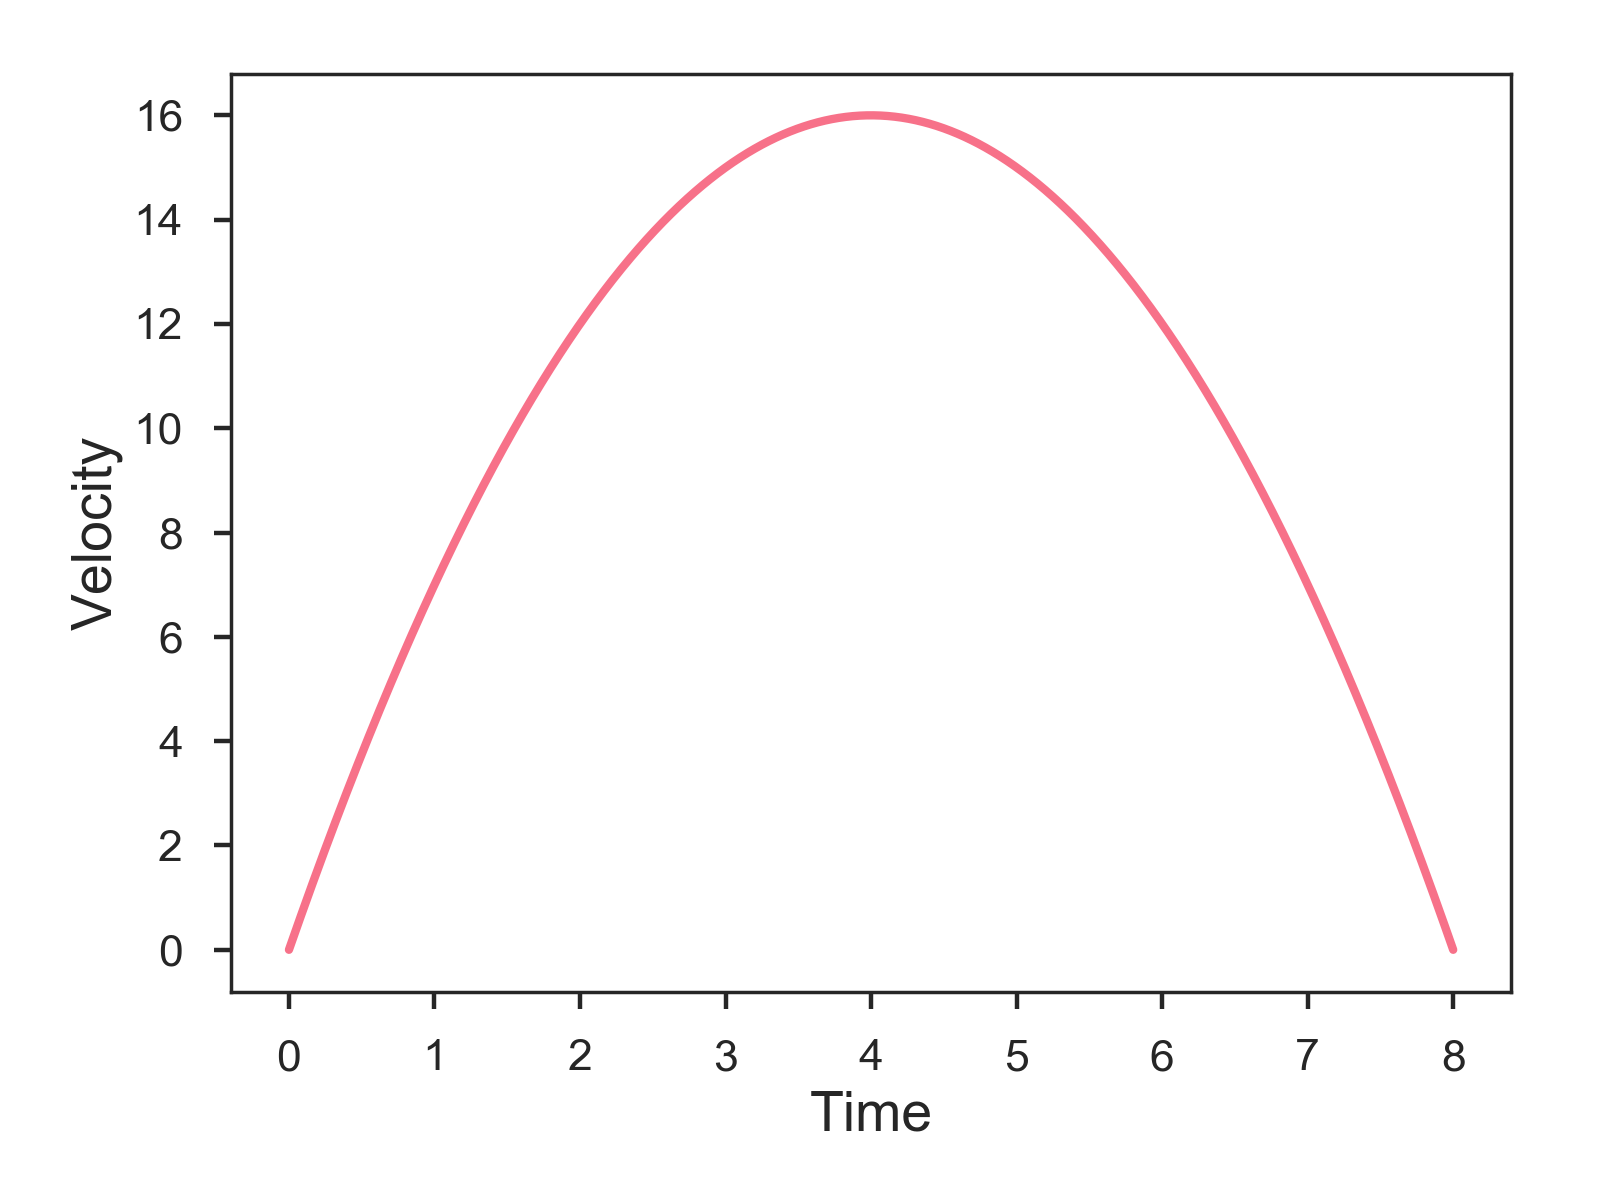

In [16]:
plt.ioff() 
fig, (ax1) = plt.subplots(1, figsize=(8, 6))            # Create figure and axis object   
ax1.set_xlabel('Time', fontsize=20)
ax1.set_ylabel('Velocity', fontsize=20)
plt.tight_layout()

x = np.linspace(lower_initial, upper_initial, length)
y = velocity(x)
ax1.plot(x, y, lw=3)
plt.show()

Sweet. So we can see that the curve representing $v(t)$ have a maximum when time is equal to 4. What does a time equal to 4 correspond to on the distance plot? Well, we can plot these side by side to make it very clear:

In [18]:
plt.ioff()                                              # Turn off interactive plotting
fig, (ax1, ax2) = plt.subplots(2, figsize=(5, 7))       # Create figure and axis object   
ax1.set_ylabel('Distance', fontsize=20)
ax2.set_ylabel('Velocity', fontsize=20)
ax2.set_xlabel('Time', fontsize=20)
plt.tight_layout()
d, = ax1.plot(0, 0, lw=3)                         # Initialize plot object for distance
d2, = ax2.plot(0, 0, lw=3)                         # Initialize plot object for distance

def animate_distance(upper_bound):
  x = np.linspace(0, upper_bound, length)
  dist = distance(x)                                # Getting y-value, distance
  vel = velocity(x)
  d.set_data(x, dist)                               # Set our data
  d2.set_data(x, vel)                               # Set our data

def init_distance():
  ax1.set_xlim(0, 8)                               # Initialize x and y limits
  ax1.set_ylim(0, 100) 
  ax2.set_xlim(0, 8)                               # Initialize x and y limits
  ax2.set_ylim(0, 17) 
  return d, d2

""" Define steps and create animation object """
step = 0.05
steps = np.arange(0, 8, step)
html_video = HTML(FuncAnimation(fig, animate_distance, steps, init_func=init_distance, 
                                interval=50, blit=True).to_html5_video())
html_video

It is clear that the velocity plot experiences a maximum at $t = 4$! This is clearly correspond to the point at which the distance plot has its maximum slope! We can also see that as the slope of the distance plot flattens out and gets closer to 0, the value of the velocity plot head towards 0!

I encourage you to move the animation slider slowly and play around with the time $t$, so you can see how the velocity and distance relate. 

---

<br>
## 1.2.1 How do we go from Velocity to Distance?
At this point we have gone through, in great detail, how we can take a function that represents distance, and determine the velocity at any any given time $t$. Now, let's pretend for a moment that you did not know the distance function. Say you only knew the function that represented velocity:

#### $$v(t) = 8t - t^2$$

Now, what if I asked you to tell me how we traveled in that period of time? How would you do it?

<br>
### 1.2.1.1 A simple example 
* next steps:
* flat line, and that calculation/area under curve
* multiple flat lines and the area under curve 
* then get into changing t for vel curve and showing how area changes 

---

# Distance

In [ ]:
fig, (ax1) = plt.subplots(1, figsize=(8, 6))            # Create figure and axis object   
ax1.set_xlabel('Time', fontsize=20)
ax1.set_ylabel('Distance', fontsize=20)
d, = ax1.plot(0, 0, lw=3)                         # Initialize plot object for distance

def animate_distance(upper_bound):
  x = np.linspace(0, upper_bound, length)
  dist = distance(x)                                # Getting y-value, velocity
  d.set_data(x, dist)                               # Set our data
  
def init_distance():
  ax1.set_xlim(0, 8)                               # Initialize x and y limits
  ax1.set_ylim(0, 100) 
  return d

""" Define steps and create animation object """
step = 0.1
steps = np.arange(0, 8, step)
ani = FuncAnimation(fig, animate_distance, steps, 
                    init_func=init_distance, interval=100, blit=True)
plt.show()

---

# Velocity and Distance

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 10))            # Create figure and axis object  
# ax1.set_xlabel('Time', fontsize=20)
ax1.set_ylabel('Velocity', fontsize=20)
ax2.set_xlabel('Time', fontsize=20)
ax2.set_ylabel('Distance', fontsize=20)
v, = ax1.plot(0, 0, lw=3)                         # Initialize plot object for velocity
d, = ax2.plot(0, 0, lw=3)                         # Initialize plot object for distance

def animate_v_d(upper_bound):
  x = np.linspace(0, upper_bound, length)
  vel = velocity(x)                                # Getting y-value, velocity
  v.set_data(x, vel)                               # Set our data
  
  dist = distance(x)
  d.set_data(x, dist)          
  
def init_v_d():
  ax1.set_xlim(0, 8)                               # Initialize x and y limits
  ax1.set_ylim(0, 17) 
  ax2.set_xlim(0, 8)                               # Initialize x and y limits
  ax2.set_ylim(0, 90) 
  
  return v, d

""" Define steps and create animation object """
step = 0.1
steps = np.arange(0, 8, step)
ani = FuncAnimation(fig, animate_v_d, steps, 
                    init_func=init_v_d, interval=100, blit=True)
plt.show()

---

# Velocity and Distance...or should we say area under velocity curve

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 10))            # Create figure and axis object  
# ax1.set_xlabel('Time', fontsize=20)
ax1.set_ylabel('Velocity', fontsize=20)
ax2.set_xlabel('Time', fontsize=20)
ax2.set_ylabel('Distance', fontsize=20)
v, = ax1.plot(0, 0, lw=3)                         # Initialize plot object for velocity
d, = ax2.plot(0, 0, lw=3)                         # Initialize plot object for distance

def animate_v_d(upper_bound):
  x = np.linspace(0, upper_bound, length)
  vel = velocity(x)                                # Getting y-value, velocity
  v.set_data(x, vel)                               # Set our data
  
  collection = ax1.fill_between(x, vel, color='lightgreen', alpha='0.1')
  path = collection.get_paths()[0]
  path.vertices[:, 1] 
  
  dist = distance(x)
  d.set_data(x, dist)    

def init_v_d():
  ax1.set_xlim(0, 8)                               # Initialize x and y limits
  ax1.set_ylim(0, 17) 
  ax2.set_xlim(0, 8)                               # Initialize x and y limits
  ax2.set_ylim(0, 90) 
  
  return v, d

""" Define steps and create animation object """
# step = 0.05      -> use for smoother animation
step = 0.1
steps = np.arange(0, 8.1, step)
# ani = FuncAnimation(fig, animate_v_d, steps, 
#                     init_func=init_v_d, interval=50, blit=True)
html_video = HTML(FuncAnimation(fig, animate_v_d, steps, init_func=init_v_d, interval=50, blit=True)
.to_html5_video())

So the main thing to note is look at how the area is changing under the velocity curve...it is changing maximally at time t = 4, which is when the distance has the highest slope. The rate at which the area under the velocity curve changes is equal to the rate at which distance changes given a certain x!!!!! What is CRAZY is that the rate at which the area under the velocity curve changes at a given x is just the value of the velocity curve at that x. THIS IS BECAUSE VELOCITY IS THE DERIVATIVE OF DISTANCE. So, in other words, the area under the velocity curve is distance, and if we want to see how the area (distance) is changing we can just look at the value of velocity at that location. Based on this relationship, we can determine the formula for distance based on whatever equation, when its derivative was taken, would have yielded the velocity equation. 

http://tiao.io/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/

In [ ]:
html_video

In [ ]:
test = np.array([1,2,3,4,5,6,7,8,9,10])
c = 1

In [ ]:
test[c-5:c]

In [ ]:
plt.ioff()                                              # Turn off interactive plotting
fig, (ax1) = plt.subplots(1, figsize=(6, 4))            # Create figure and axis object   
ax1.set_xlabel('Time', fontsize=20)
ax1.set_ylabel('Distance', fontsize=20)
plt.tight_layout()
d, = ax1.plot(0, 0, lw=3)                         # Initialize plot object for distance

def animate_distance(upper_bound):
  x = np.linspace(0, upper_bound, length)
  dist = distance(x)                                # Getting y-value, velocity
  d.set_data(x, dist)                               # Set our data
  
def init_distance():
  ax1.set_xlim(0, 8)                               # Initialize x and y limits
  ax1.set_ylim(0, 100) 
  return d

""" Define steps and create animation object """
step = 0.05
steps = np.arange(0, 8, step)
# ani = FuncAnimation(fig, animate_distance, steps, 
#                     init_func=init_distance, interval=100, blit=True)
html_video = HTML(FuncAnimation(fig, animate_distance, steps, init_func=init_distance, 
                                interval=50, blit=True).to_html5_video())
html_video

In [ ]:
plt.ioff()                                              # Turn off interactive plotting
fig, (ax1) = plt.subplots(1, figsize=(6, 4))            # Create figure and axis object   
ax1.set_xlabel('Time', fontsize=20)
ax1.set_ylabel('Distance', fontsize=20)
plt.tight_layout()
d, = ax1.plot(0, 0, lw=3)                         # Initialize plot object for distance

def animate_distance(upper_bound):
  x = np.linspace(0, upper_bound, length)
  dist = distance(x)                                # Getting y-value, velocity
  d.set_data(x, dist)                               # Set our data
  plt.axvline(x=2, ymax=100, color="lightblue")
  plt.axvline(x=4, ymax=100, color="lightblue")
  plt.axvline(x=6, ymax=100, color="lightblue")
  plt.axvline(x=8, ymax=100, color="lightblue")
  
def init_distance():
  ax1.set_xlim(0, 8)                               # Initialize x and y limits
  ax1.set_ylim(0, 100) 
  return d

""" Define steps and create animation object """
step = 0.05
steps = np.arange(0, 8, step)
# ani = FuncAnimation(fig, animate_distance, steps, 
#                     init_func=init_distance, interval=100, blit=True)
html_video = HTML(FuncAnimation(fig, animate_distance, steps, init_func=init_distance, 
                                interval=50, blit=True).to_html5_video())
html_video

In [ ]:
def velocity(x):
  return x * (8 - x)

fig, (ax1) = plt.subplots(1, figsize=(8, 6))            # Create figure and axis object  
ax1.set_xlabel('Time', fontsize=20)
ax1.set_ylabel('Velocity', fontsize=20)
v, = ax1.plot(0, 0, lw=3)                         # Initialize plot object for velocity

def animate_velocity(upper_bound):
  x = np.linspace(0, upper_bound, length)
  vel = velocity(x)                                # Getting y-value, velocity
  v.set_data(x, vel)                               # Set our data
  
def init_velocity():
  ax1.set_xlim(0, 8)                               # Initialize x and y limits
  ax1.set_ylim(0, 17) 
  return v

""" Define steps and create animation object """
step = 0.1
steps = np.arange(0, 8, step)
ani = FuncAnimation(fig, animate_velocity, steps, 
                    init_func=init_velocity, interval=100, blit=True)
plt.show()